# House Price Prediction

In [4]:
#Importing required Python packages
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from matplotlib.colors import Normalize
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import operator
import warnings
warnings.filterwarnings("ignore")

In [6]:
#read training file to train the model
train = pd.read_csv('Training.csv',index_col='date',parse_dates=True)

#read testing file to test the model
test = pd.read_csv('Testing.csv',index_col='date',parse_dates=True)

### when we have to show the normal distribution of data then we use distribution plot(distplot)

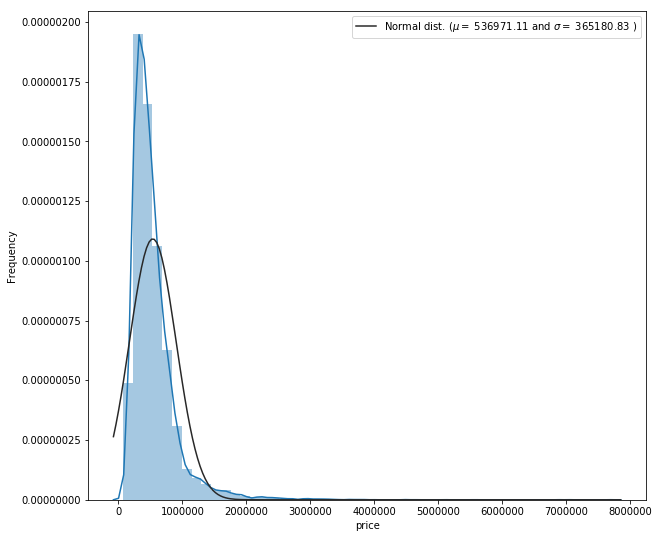

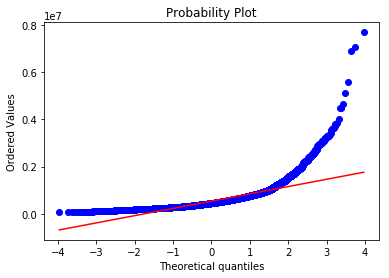

In [8]:
#Let's first check the distribution of housing price training dataset.

plt.subplots(figsize=(10,9))
sns.distplot(train['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['price'], plot=plt)
plt.show()

In [9]:
#It's extremely skewed, we may consider to take the log transformation of it.

train['log_price'] = np.log(train['price'])
test['log_price'] = np.log(test['price'])

### when we have month/year/weeks and we have to find any type of selling or any 
### relation between month/yr/week or we can say we have to find seasonality so we can use 

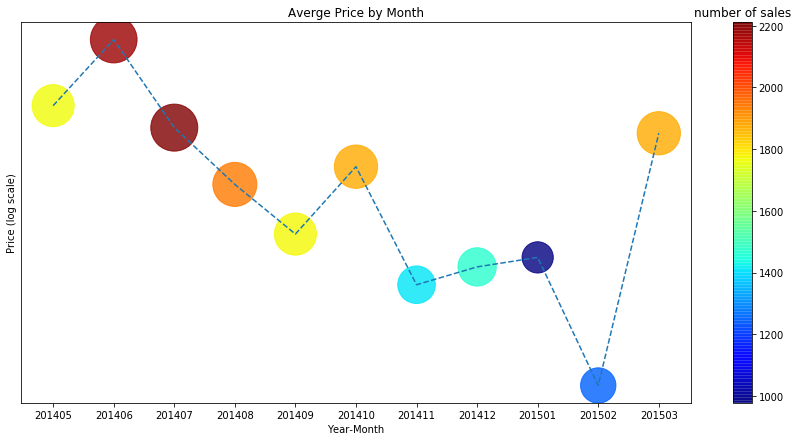

In [11]:
#Now we will check the " seasonality of housing price ". 
#In the following plot the y axis is representing the housing price on log scale,
#The color of the bubbles shows the number of sales.
#When the number of sales is high, the housing price is also high, which is quite reasonable.
#But sometimes, the market might response a bit slow,that's why we can see in May of 2015.

# monthly change of prices in training dataset
yr=train.index.year *100 
mn=train.index.month
da=train.index.day
train['dat_year']=yr
train['dat_month']=mn
train['dat_day']=da

ym_summary = train.groupby(yr+mn)['price'].agg(['mean','count'])

vmin = np.min(ym_summary['count'])
vmax = np.max(ym_summary['count'])
norm = colors.Normalize(vmin,vmax)
plt.figure(figsize=(15,7))
plt.scatter(x=np.arange(ym_summary.shape[0]), y =ym_summary['mean'],c= ym_summary['count'],
            s= ym_summary['count'],norm=norm ,alpha = 0.8, cmap='jet')

plt.plot(np.arange(ym_summary.shape[0]), ym_summary['mean'] ,'--')
plt.xticks(np.arange(ym_summary.shape[0]),ym_summary.index.values)
plt.yscale('log')
plt.xlabel('Year-Month')
plt.ylabel('Price (log scale)')
clb = plt.colorbar() 
clb.ax.set_title('number of sales')
plt.title('Averge Price by Month')
plt.show()

#We can see there are clear seasonality, so create some month indicators might be a good idea.

### if we have to find Relationship between latitude/longitude of any dataset and is in the form of tree structure so we can use -

Text(0.5,1,'Price')

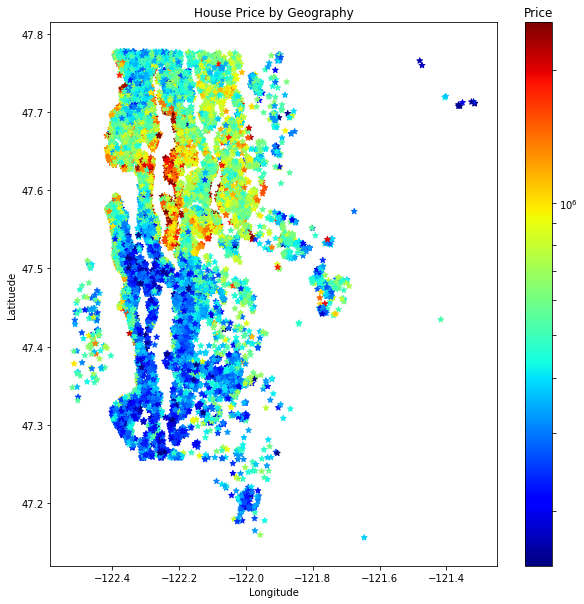

In [13]:
#Another very important factor would be "location".
#So let's check the housing price by latitude and longitude.
#Relationship between latitude/longitude of train dataset
plt.figure(figsize=(10,10))
vmin = np.min(train.price)
vmax = np.max(train.price)
norm = colors.LogNorm(vmin*2,vmax/3)

plt.scatter(train.long,train.lat, marker='*',c=train.price,norm=norm,cmap='jet') 

plt.xlabel('Longitude')
plt.ylabel('Latituede')
plt.title('House Price by Geography')
clb = plt.colorbar() 
clb.ax.set_title('Price')

#As we can see from this graph, the northern area are generally more expensive than the southern.
#Most of the million-dollar houses (right stars in the graph) are around the hollow area in the north.
#That should be Lake Washington.
#Latitude and Longitude can be very good features if we want to build a model to predict the housing price.

#Another point to note from the graph is that the relationship between latitude/longitude and housing price is not linear,
#so linear model might not work very well.
#But tree based models should work better in this case. 

## co-relation plot

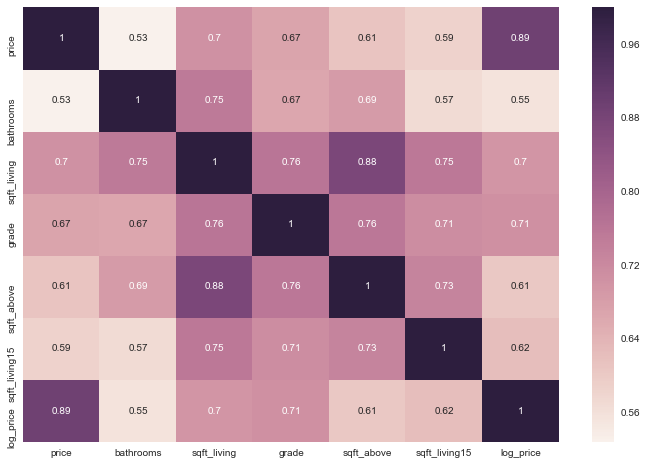

In [59]:
#Coralation plot of  highly corelated features in train dataset
#There are couple of variables related to "the house area".
#Some of them have very strong correlation.
#Boosted tree models would intrinsincally do the variable selection,
#but if we want to build a statistical model,we'd better remove the highly correlated variables. 

top_feature = corr.index[abs(corr['price']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## violine plot
<img src='vi.png'>

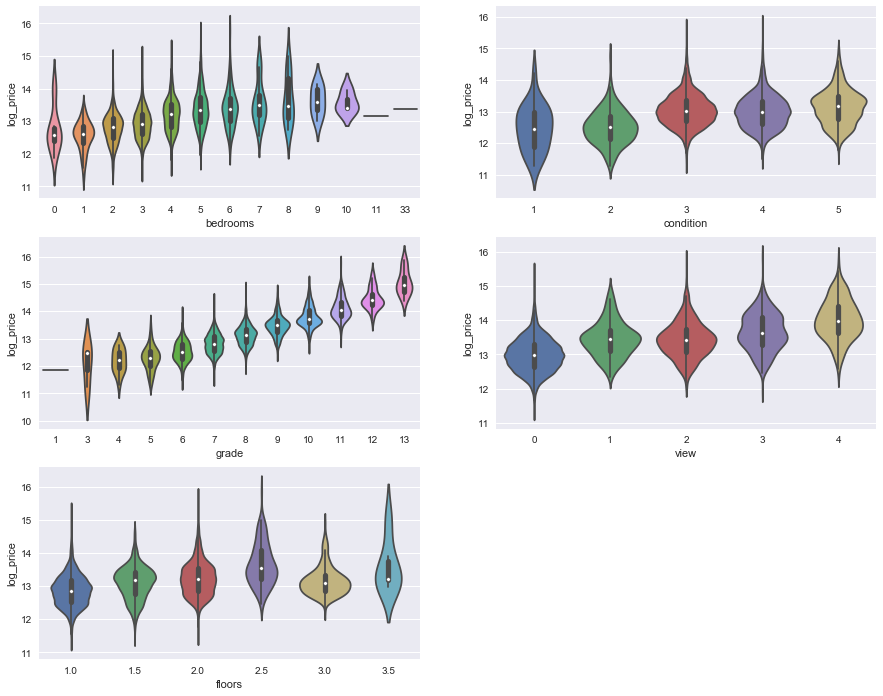

In [68]:
#Let's see the "bivariate relationship of these variables with housing price". 
#for train

fig = plt.figure(figsize=(15,12))
fig.add_subplot(3,2,1)
sns.violinplot(x="bedrooms", y="log_price", data=train)    
fig.add_subplot(3,2,2)
sns.violinplot(x="condition", y="log_price", data=train)  
fig.add_subplot(3,2,3)
sns.violinplot(x="grade", y="log_price", data=train)   
fig.add_subplot(3,2,4)
sns.violinplot(x="view", y="log_price", data=train)  
fig.add_subplot(3,2,5)
sns.violinplot(x="floors", y="log_price", data=train)  

## when we have to show two groups together so we can use -

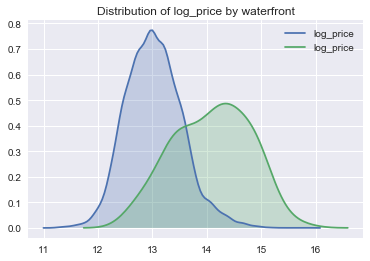

In [70]:
#for train
wf = train.waterfront.unique()
for i in wf:
    temp_x=train.loc[train.waterfront==i,'log_price']
    ax = sns.kdeplot(temp_x,shade=True)
plt.title('Distribution of log_price by waterfront')


In [74]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#score before
before_k=model.score(X_test, y_test)*100
print("score before applying prediction:  ",before_k)

#score after
after_k=r2_score(y_pred,y_test)*100
print("score aftter applying prediction:  ",after_k)


#mean square error
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

score before applying predictio:   39.0118394439
score aftter applying predictio:   -23.1522036887
Test RMSE: 0.39958250186


In [75]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#score before
before_d=model.score(X_test, y_test)*100
print("score before applying prediction:  ",before_d)

#score after
after_d=r2_score(y_pred,y_test)*100
print("score aftter applying prediction:  ",after_d)


#mean square error
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

score before applying predictio:   72.420935567
score aftter applying predictio:   73.5519589206
Test RMSE: 0.268703583927


In [76]:
#THIS MIGHT TAKE A WHILE TO RUN

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

#score before
before_r=model.score(X_test, y_test)*100
print("score before applying prediction:  ",before_r)

#score after
after_r=r2_score(y_pred,y_test)*100
print("score aftter applying prediction:  ",after_r)


#mean square error
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

score before applying predictio:   86.010181967
score aftter applying predictio:   84.0070885333
Test RMSE: 0.191376993273


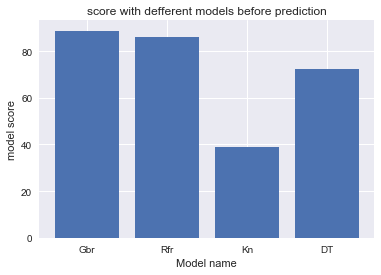

In [77]:
mdl=[before,before_r,before_k,before_d]
mdl_nme=('Gbr','Rfr','Kn','DT')
y_p=np.arange(len(mdl_nme))
plt.bar(y_p,mdl)
plt.xticks(y_p,mdl_nme)
plt.xlabel('Model name')
plt.ylabel('model score')
plt.title("score with defferent models before prediction")
plt.show()